<a href="https://www.kaggle.com/code/sainonpha/case-study-bike-python?scriptVersionId=105994571" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas.api.types import CategoricalDtype
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/case-study-bike-1/202110-divvy-tripdata.csv
/kaggle/input/case-study-bike-1/202109-divvy-tripdata.csv
/kaggle/input/case-study-bike-1/202111-divvy-tripdata.csv
/kaggle/input/case-study-bike-1/202107-divvy-tripdata.csv
/kaggle/input/case-study-bike-1/202202-divvy-tripdata.csv
/kaggle/input/case-study-bike-1/202203-divvy-tripdata.csv
/kaggle/input/case-study-bike-1/202205-divvy-tripdata.csv
/kaggle/input/case-study-bike-1/202206-divvy-tripdata.csv
/kaggle/input/case-study-bike-1/202108-divvy-tripdata.csv
/kaggle/input/case-study-bike-1/202201-divvy-tripdata.csv
/kaggle/input/case-study-bike-1/202204-divvy-tripdata.csv
/kaggle/input/case-study-bike-1/202112-divvy-tripdata.csv


In [2]:
#read 12 csv files
jul2021 =pd.read_csv('../input/case-study-bike-1/202107-divvy-tripdata.csv')
aug2021 =pd.read_csv('../input/case-study-bike-1/202108-divvy-tripdata.csv')
sept2021=pd.read_csv('../input/case-study-bike-1/202109-divvy-tripdata.csv')
oct2021 =pd.read_csv('../input/case-study-bike-1/202110-divvy-tripdata.csv')
nov2021 =pd.read_csv('../input/case-study-bike-1/202111-divvy-tripdata.csv')
dec2021 =pd.read_csv('../input/case-study-bike-1/202112-divvy-tripdata.csv')
jan2022 =pd.read_csv('../input/case-study-bike-1/202201-divvy-tripdata.csv')
feb2022 =pd.read_csv('../input/case-study-bike-1/202202-divvy-tripdata.csv')
mar2022 =pd.read_csv('../input/case-study-bike-1/202203-divvy-tripdata.csv')
apr2022 =pd.read_csv('../input/case-study-bike-1/202204-divvy-tripdata.csv')
may2022 =pd.read_csv('../input/case-study-bike-1/202205-divvy-tripdata.csv')
jun2022 =pd.read_csv('../input/case-study-bike-1/202206-divvy-tripdata.csv')

In [3]:
bike=pd.concat([jul2021,aug2021,sept2021,oct2021,nov2021,dec2021,jan2022,feb2022,mar2022,apr2022,may2022,jun2022],ignore_index = True)
bike

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,0A1B623926EF4E16,docked_bike,2021-07-02 14:44:36,2021-07-02 15:19:58,Michigan Ave & Washington St,13001,Halsted St & North Branch St,KA1504000117,41.883984,-87.624684,41.899368,-87.648480,casual
1,B2D5583A5A5E76EE,classic_bike,2021-07-07 16:57:42,2021-07-07 17:16:09,California Ave & Cortez St,17660,Wood St & Hubbard St,13432,41.900363,-87.696704,41.889899,-87.671473,casual
2,6F264597DDBF427A,classic_bike,2021-07-25 11:30:55,2021-07-25 11:48:45,Wabash Ave & 16th St,SL-012,Rush St & Hubbard St,KA1503000044,41.860384,-87.625813,41.890173,-87.626185,member
3,379B58EAB20E8AA5,classic_bike,2021-07-08 22:08:30,2021-07-08 22:23:32,California Ave & Cortez St,17660,Carpenter St & Huron St,13196,41.900363,-87.696704,41.894556,-87.653449,member
4,6615C1E4EB08E8FB,electric_bike,2021-07-28 16:08:06,2021-07-28 16:27:09,California Ave & Cortez St,17660,Elizabeth (May) St & Fulton St,13197,41.900350,-87.696682,41.886593,-87.658387,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5900380,7B3B2890CA85E05D,classic_bike,2022-06-25 00:56:48,2022-06-25 01:01:39,Sheffield Ave & Kingsbury St,13154,Sheffield Ave & Kingsbury St,13154,41.910522,-87.653106,41.910522,-87.653106,member
5900381,1E993989CC66BCBC,classic_bike,2022-06-25 00:56:25,2022-06-25 01:00:26,Sheffield Ave & Kingsbury St,13154,Sheffield Ave & Kingsbury St,13154,41.910522,-87.653106,41.910522,-87.653106,member
5900382,AEA166296BC67566,electric_bike,2022-06-12 12:47:12,2022-06-12 12:47:36,Milwaukee Ave & Fullerton Ave,428,Milwaukee Ave & Fullerton Ave,428,41.920000,-87.700000,41.920000,-87.700000,casual
5900383,B9F527742959CF03,classic_bike,2022-06-12 13:28:46,2022-06-12 13:53:11,Clark St & Randolph St,TA1305000030,Clark St & Randolph St,TA1305000030,41.884576,-87.631890,41.884576,-87.631890,casual


In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5900385 entries, 0 to 5900384
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 585.2+ MB


In [5]:
bike['member_casual'].unique()

array(['casual', 'member'], dtype=object)

In [6]:
#let's turn them into a date and time format

bike['started_at']=pd.to_datetime(bike['started_at'])
bike['ended_at']=pd.to_datetime(bike['ended_at'])

# Coverting datatype of "started_at" & "ended_at" columns to "datetime64" type.

bike['started_at']=bike['started_at'].astype('datetime64')
bike['ended_at']=bike['ended_at'].astype('datetime64')

In [7]:
#create a new column which will give the length
bike['ride_length']=(bike['ended_at']-bike['started_at'])/pd.Timedelta(minutes=1)

# Coverting datatype of 'ride_length' to 'int32'
bike['ride_length']=bike['ride_length'].astype('int32')

In [8]:
#create a new column 'day_of_week'
bike['day_of_week']=bike['started_at'].dt.dayofweek

In [9]:
#create a new column 'month'
bike['month']=pd.DatetimeIndex(bike['started_at']).month

In [10]:
# Deleting Columns which are not relevant for my analysis.
bike =bike.drop(columns=['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng'])


In [11]:
bike.shape

(5900385, 8)

In [12]:
bike.isna().sum()

ride_id          0
rideable_type    0
started_at       0
ended_at         0
member_casual    0
ride_length      0
day_of_week      0
month            0
dtype: int64

In [13]:
bike.isnull().sum()

ride_id          0
rideable_type    0
started_at       0
ended_at         0
member_casual    0
ride_length      0
day_of_week      0
month            0
dtype: int64

In [14]:
#create new column 'year' and change 'day_of_week','Month' to Name

bike['year'] = bike['started_at'].dt.year

MM = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
bike['month'] = bike['started_at'].dt.month_name()
bike['month'] = bike['month'].astype(CategoricalDtype(categories=MM, ordered=False))

WW = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
bike['day_of_week'] =bike['started_at'].dt.day_name()
bike['day_of_week'] = bike['day_of_week'].astype(CategoricalDtype(categories=WW, ordered=False))

bike['hour'] = bike['started_at'].dt.hour

bike = bike.astype({'year':'int16', 'hour':'int8'})

In [15]:
bike.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length,day_of_week,month,year,hour
0,0A1B623926EF4E16,docked_bike,2021-07-02 14:44:36,2021-07-02 15:19:58,casual,35,Friday,July,2021,14
1,B2D5583A5A5E76EE,classic_bike,2021-07-07 16:57:42,2021-07-07 17:16:09,casual,18,Wednesday,July,2021,16
2,6F264597DDBF427A,classic_bike,2021-07-25 11:30:55,2021-07-25 11:48:45,member,17,Sunday,July,2021,11
3,379B58EAB20E8AA5,classic_bike,2021-07-08 22:08:30,2021-07-08 22:23:32,member,15,Thursday,July,2021,22
4,6615C1E4EB08E8FB,electric_bike,2021-07-28 16:08:06,2021-07-28 16:27:09,casual,19,Wednesday,July,2021,16


In [16]:
#Rides by Customer Type

RCD=bike.groupby('member_casual', as_index=True)[['ride_id']].count()
RCD

,ride_id
member_casual,
casual,2558227
member,3342158


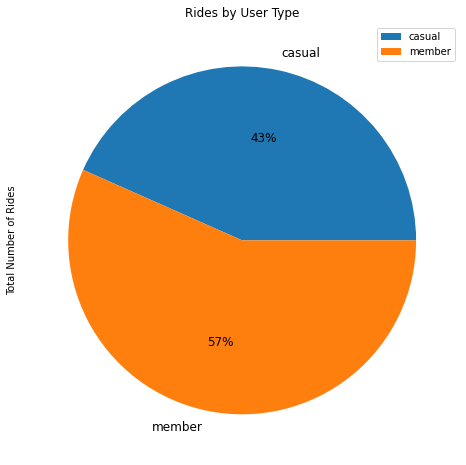

In [17]:
RCD['ride_id'].plot.pie(x='member_casual', ylabel='Total Number of Rides', title='Rides by User Type', legend=True,
                       autopct='%1.0f%%', fontsize='12', startangle=0, figsize=(10, 8))
plt.show()

In [18]:
#Average Ride Length

ARL=bike.groupby('member_casual', as_index=False)[['ride_length']].mean()
ARL

,member_casual,ride_length
0,casual,29.329480
1,member,12.493404


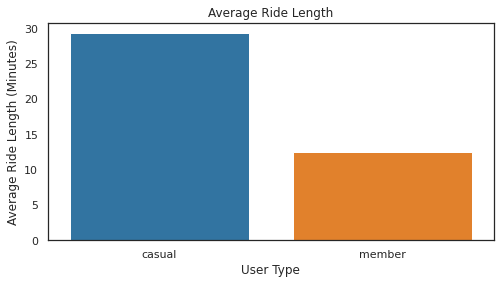

In [19]:
#Visualizing Average Ride Length
ARL = bike[['ride_length', 'member_casual']]
ARL=ARL.groupby(['member_casual'], as_index=False)[['ride_length']].mean()

plt.figure(figsize = (8,4))
sns.set_theme(style='white')
sns.barplot(data=ARL, x='member_casual', y='ride_length', palette='tab10').set_title('Average Ride Length')

plt.xlabel('User Type')
plt.ylabel('Average Ride Length (Minutes)')
plt.show()

In [20]:
#number of rideable_type
NRT= pd.pivot_table(bike, index=['rideable_type', 'member_casual'], values='ride_id', aggfunc=['count'], margins=True, margins_name='total count')
NRT

count
                             ride_id
rideable_type member_casual         
classic_bike  casual         1218286
              member         1971091
docked_bike   casual          253371
electric_bike casual         1086570
              member         1371067
total count                  5900385

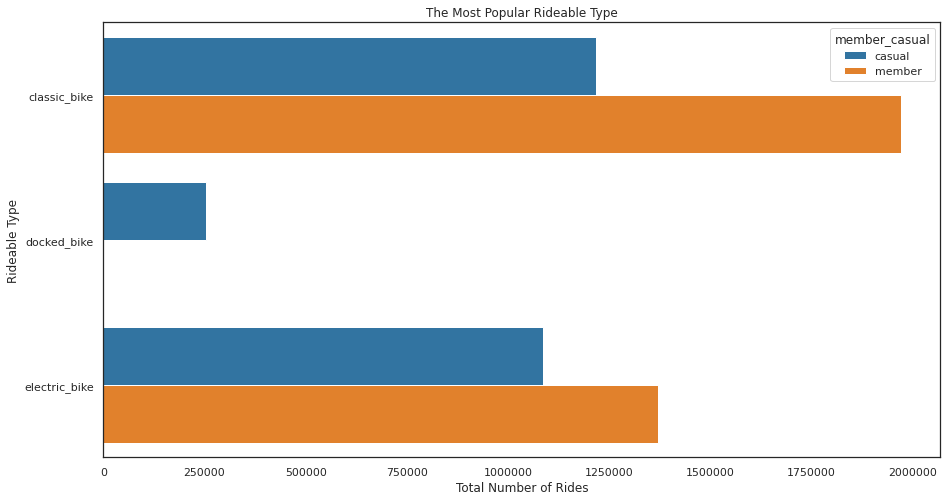

In [21]:
NRT =bike[['rideable_type', 'member_casual', 'ride_id']]
NRT = NRT.groupby(['rideable_type', 'member_casual'], as_index=False)[['ride_id']].count()

plt.figure(figsize = (15,8))
plt.ticklabel_format(style='plain', axis='x')
sns.barplot(x='ride_id', y='rideable_type', hue='member_casual', palette='tab10', data=NRT).set_title('The Most Popular Rideable Type')

plt.xlabel('Total Number of Rides')
plt.ylabel('Rideable Type')
plt.show()

In [22]:
#number of day of week Rentals

DOW=pd.pivot_table(bike,index=['day_of_week','member_casual'],values='ride_id', aggfunc=['count'],margins=True, margins_name='total count')
DOW

count
                           ride_id
day_of_week member_casual         
Sunday      casual          467119
            member          398944
Monday      casual          304001
            member          469045
Tuesday     casual          277774
            member          518246
Wednesday   casual          285485
            member          516577
Thursday    casual          325171
            member          525936
Friday      casual          363105
            member          469256
Saturday    casual          535572
            member          444154
total count                5900385

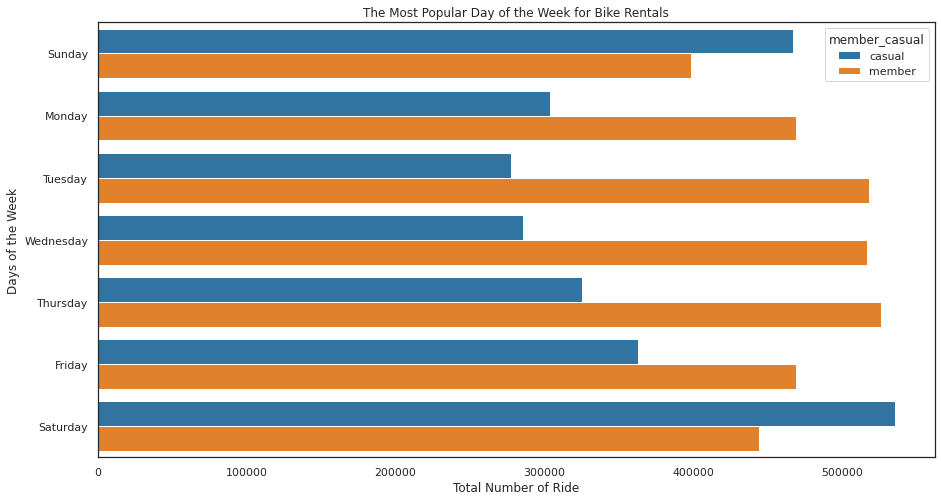

In [23]:
DOW =bike[['day_of_week', 'member_casual', 'ride_id']]
DOW = DOW.groupby(['day_of_week', 'member_casual'], as_index=False)[['ride_id']].count()

plt.figure(figsize = (15,8))
sns.barplot(x='ride_id', y='day_of_week', hue='member_casual', palette='tab10', data=DOW).set_title('The Most Popular Day of the Week for Bike Rentals')

plt.xlabel('Total Number of Ride')
plt.ylabel('Days of the Week')
plt.show()

In [24]:
#number of monthly Rentals

NMR=pd.pivot_table(bike, index=['month', 'member_casual'], values='ride_id', aggfunc=['count'], margins=True, margins_name='total count')
NMR

count
                           ride_id
month       member_casual         
January     casual           18520
            member           85250
February    casual           21416
            member           94193
March       casual           89882
            member          194160
April       casual          126417
            member          244832
May         casual          280415
            member          354443
June        casual          369051
            member          400153
July        casual          442056
            member          380354
August      casual          412671
            member          391681
September   casual          363890
            member          392257
October     casual          257242
            member          373984
November    casual          106929
            member          253049
December    casual           69738
            member          177802
total count                5900385

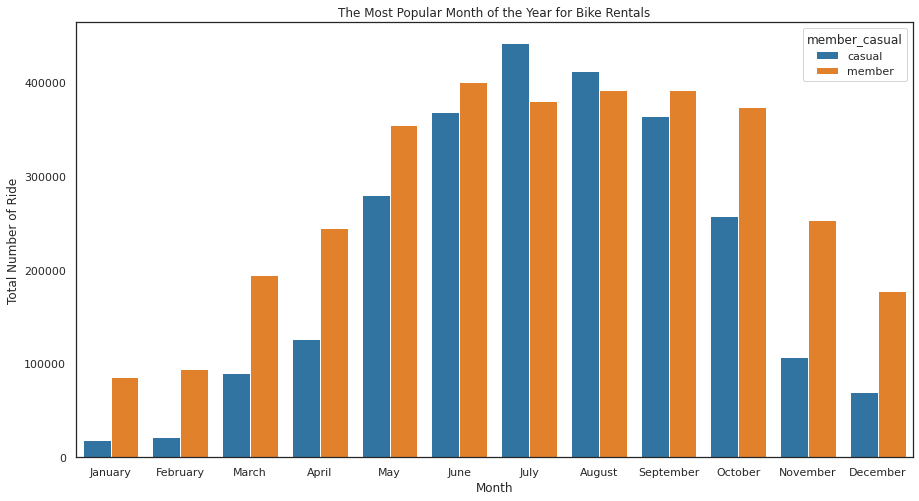

In [25]:
NMR =bike[['month', 'member_casual', 'ride_id']]
NMR= NMR.groupby(['month', 'member_casual'], as_index=False)[['ride_id']].count()

plt.figure(figsize = (15,8))
sns.barplot(x='month', y='ride_id', hue='member_casual', palette='tab10', data=NMR).set_title('The Most Popular Month of the Year for Bike Rentals')

plt.xlabel('Month')
plt.ylabel('Total Number of Ride')
plt.show()